Explore statistics of named entity recognition results

In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils import merge_artfiles
from utils_EDAplots import plotbar_train_dev,plothist_train_dev

# Load data containing NEP (predictions)
foldername = get_foldername('sq_pp_ner')
arts_train = load_data('train.json',foldername)
arts_dev = load_data('dev.json',foldername)

# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)

arts = arts_train + arts_dev
print(arts[1]['title'])
# print(arts[1]['paragraphs'][0]['context'])




Frédéric_Chopin


In [2]:
# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [3]:
# Take a subset of data
art = arts[:] #in this case, take everything

# Get ratio of entities vs non-entities in each article

For assesssing class imbalance

In [4]:

from utils_NLP import allenNLP_classify_blanks
art = allenNLP_classify_blanks(art)

In [5]:

atot_words = []
atot_blanks = []
abw_ratio = []

for a in arts:
    # Total things up for each paragraph
    ptot_words = [len(p['blank_classified_allenNER']) for p in a['paragraphs']] #Paragraph total words
    ptot_blanks = [sum(p['blank_classified_allenNER']) for p in a['paragraphs']] #Paragraph total blanks
    
    # For articles
    atot_words.append(sum(ptot_words))
        # Total blanks per article
    atot_blanks.append(sum(ptot_blanks))
        # Ratio of blanks to words
    abw_ratio.append(sum(ptot_blanks)/sum(ptot_words)*100)

## Total blanks per article

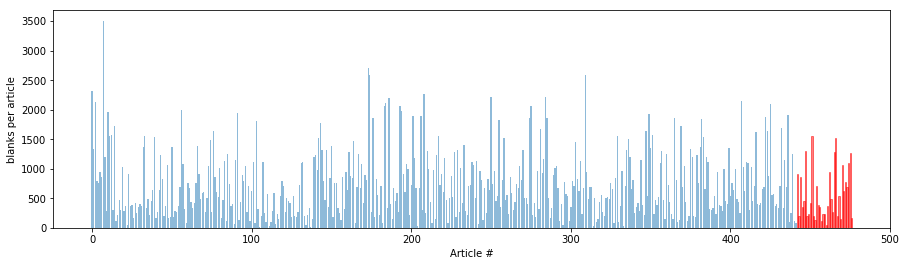

In [8]:

myvar = atot_blanks
varname = '# blanks'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

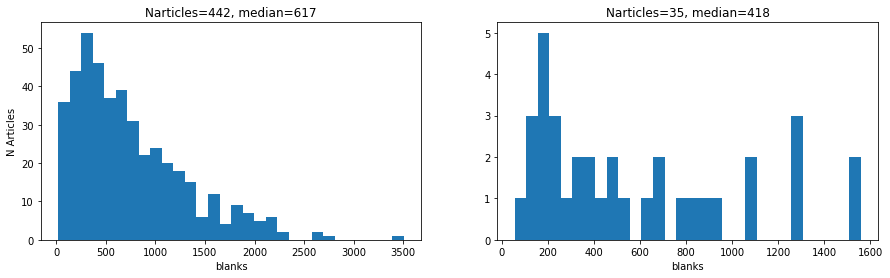

In [9]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Percent of blanked words

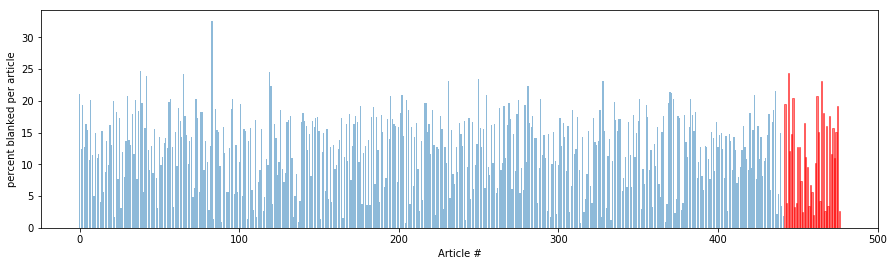

In [10]:

myvar = abw_ratio
varname = 'percent blanked'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

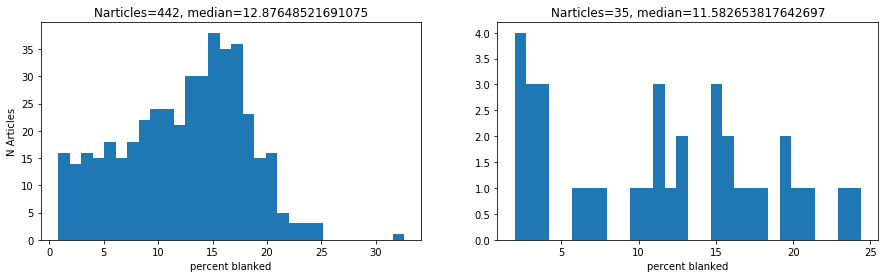

In [11]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')